## Chapter 5. 회귀

### 01. 회귀 소개

회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법.<br>
통계학 용어를 빌리자면 회귀는 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭

ex) 아파트의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지를
모델링하고 예측하는 것.

회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다.<br>
회귀에서 가장 중요한 것은 회귀 계수. 이 회귀 계수가 선형이냐, 아니냐에 따라 선형 회귀와 비선형 회귀로 나눔.<br>
독립 변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나눔.

선형 회귀는 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식.
선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉨.

- 일반 선형 회귀 : 실제 값과 예측값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델.
- 릿지(Ridge) : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.
- 라쏘(Lasso) : 라쏘 회귀는 선형 회귀에 L1 규제를 추가한 회귀 모델. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것.
- 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델. L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정

### 02. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

'점진적으로' 반복적인 계산을 통해, W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

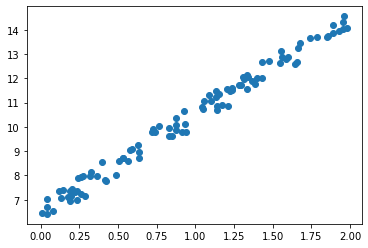

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사 (W1 = 4, W0 = 6)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

plt.scatter(X, y)

In [16]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [28]:
def get_weight_update(w1, w0, X, y, learing_rate=0.01):
    N = len(X)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w0_factors = np.ones((N, 1))
    
    w1_update -= 2/N*learing_rate*(np.dot(X.T, diff))
    w0_update -= 2/N*learing_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [10]:
def gradient_descent_steps(X, y, iters = 10000):
    w1 = np.zeros((1, 1))
    w0 = np.zeros((1, 1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1, w0, X, y, learing_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [32]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1 : {0:.3f}, w0 : {1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.028, w0 : 6.490
Gradient Descent Total Cost : 0.0775


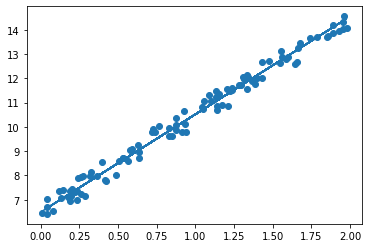

In [33]:
plt.scatter(X, y)
plt.plot(X, y_pred)

실제 선형식인 y = 4X + 6과 유사하게 w1은 4.028, w0은 6.490이 도출됨.<br>
예측 오류 비용은 약 0.0775<br>
경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있다.

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을
업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다.<br>
그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용한다.

#### 확률적 경사 하강법

In [59]:
def stochastic_gradient_descent_steps(X, y ,batch_size = 10, iters = 1000):
    w1 = np.zeros((1, 1))
    w0 = np.zeros((1, 1))
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0 : batch_size]]
        sample_y = y[stochastic_random_index[0 : batch_size]]
        
        w1_update, w0_update = get_weight_update(w1, w0, sample_X, sample_y)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [58]:
w1, w0 = stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000)
print('w1 : {0:.3f}, w0 : {1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.031, w0 : 6.486
Stochastic Gradient Descent Total Cost : 0.0777


### 03. 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측

#### LinearRegression 클래스 - Ordinary Least Squares

LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해
OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다.

OLS 기반의 회귀 계수 계산은 입력 피처의 독립성의 많은 영향을 받는다.<br>
피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐.<br>
이러한 현상을 다중공선성(multi-collinearity) 문제라고 함.

일반적으로 상관계수가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나
규제를 적용.<br>
또한 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는것도 고려.

#### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [6]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
import pandas as pd
import numpy as np

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 데이터의 정보 파악
# 506 row , null값이 없으며 , 전부 float 타입
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


각 컬럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화

RM(방 개수)은 양의 선형성이 가장 크며, LSTAT(하위 계층의 비율)는 음의 선형성이 가장 크다.

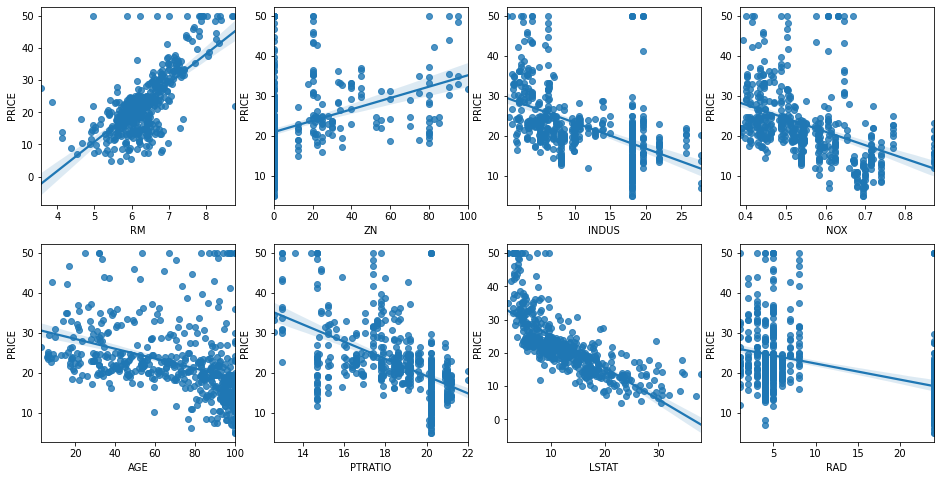

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
fig, ax = plt.subplots(2, 4, figsize=(16,8))
for idx, feature in enumerate(lm_features):
    row = int(idx / 4)
    col = idx % 4
    
    sns.regplot(feature, 'PRICE', data = boston_df, ax = ax[row][col])

In [22]:
X = boston_df.iloc[:,:-1]
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('mse : {0} rmse : {1} '.format(mse, rmse))
print('Variance score : {0}'.format(r2_score(y_test, y_preds)))

neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt( -1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 평균 RMSE scores : {0:.3f}'.format(avg_rmse))

mse : 24.2911194749736 rmse : 4.928602182665345 
Variance score : 0.6687594935356309
 5 folds의 평균 RMSE scores : 5.829


In [9]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  30.246750993923488
회귀 계수값 :  [ -0.1   0.    0.    2.8 -17.2   4.4  -0.   -1.4   0.3  -0.   -0.9   0.
  -0.5]


In [14]:
coeff = pd.Series(np.round(lr.coef_, 1), index=X_train.columns)
coeff.sort_values(ascending=False)

RM          4.4
CHAS        2.8
RAD         0.3
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -17.2
dtype: float64

### 04. 다항 회귀와 과대적합/과소적합 이해

#### 다항 회귀 이해

회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을
다항(Polynomial) 회귀라고 함.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처 : \n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 : \n', poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


#### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능.<br>
다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작
테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐

#### 편향-분산 트레이드오프(Bias-Variance Trade off)

편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나.<br>
일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다.<br>
편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합)<br>
편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이
가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.

### 05. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

#### 규제 선형 모델의 개요

비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을
규제(Regularization)라고 부름.<br>
규제는 크게 L2 방식과 L1 방식으로 구분.<br>
L2 규제는 영향력이 큰 회귀 계수 값을 낮춤.<br>
L1 규제는 영향력이 크지 않은 회귀 계수 값을 0으로 변환.

#### 릿지 회귀

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE scores : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds의 평균 RMSE scores : 5.518


In [23]:
# 릿지에 사용될 alpha 파라미터의 값을 정리
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt( -1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5 folds의 평균 RSME scores : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RSME scores : 5.829
alpha 0.1일 때 5 folds의 평균 RSME scores : 5.788
alpha 1일 때 5 folds의 평균 RSME scores : 5.653
alpha 10일 때 5 folds의 평균 RSME scores : 5.518
alpha 100일 때 5 folds의 평균 RSME scores : 5.330


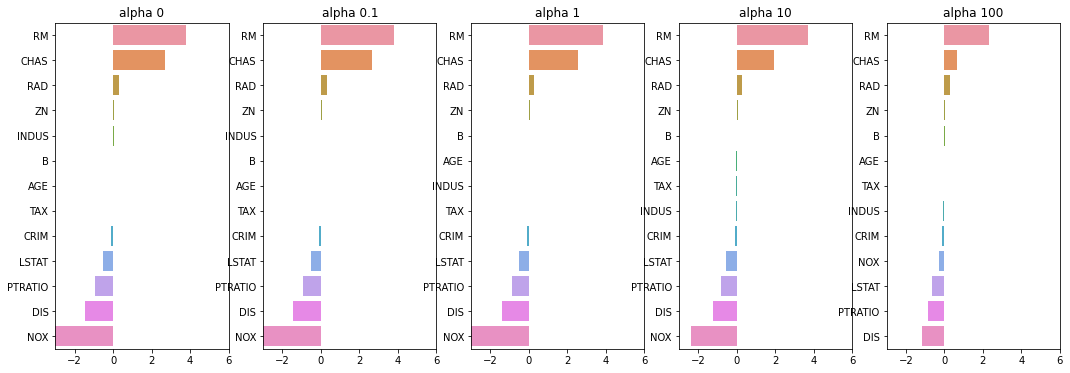

In [29]:
fig, axs = plt.subplots(1, 5, figsize=(18, 6))
coef_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    coef = pd.Series(ridge.coef_, index = X_data.columns)
    colname = 'alpha '+str(alpha)
    coef_df[colname] = coef
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])
plt.show()

In [32]:
sort_column = 'alpha '+ str(alphas[0])
coef_df.sort_values(by=sort_column ,ascending=False)

,alpha 0,alpha 0.1,alpha 1,alpha 10,alpha 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있다.
하지만 릿지 회귀의 경우 회귀 계수를 0으로 만들지는 않는다.

#### 라쏘 회귀

L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀.<br>
L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거.<br>
적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가짐.<br>

In [35]:
from sklearn.linear_model import Lasso
# 라쏘에 사용될 alpha 파라미터의 값을 정리
alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt( -1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5 folds의 평균 RSME scores : {1:.3f}'.format(alpha, avg_rmse))

alpha 0.07일 때 5 folds의 평균 RSME scores : 5.612
alpha 0.1일 때 5 folds의 평균 RSME scores : 5.615
alpha 0.5일 때 5 folds의 평균 RSME scores : 5.669
alpha 1일 때 5 folds의 평균 RSME scores : 5.776
alpha 3일 때 5 folds의 평균 RSME scores : 6.189


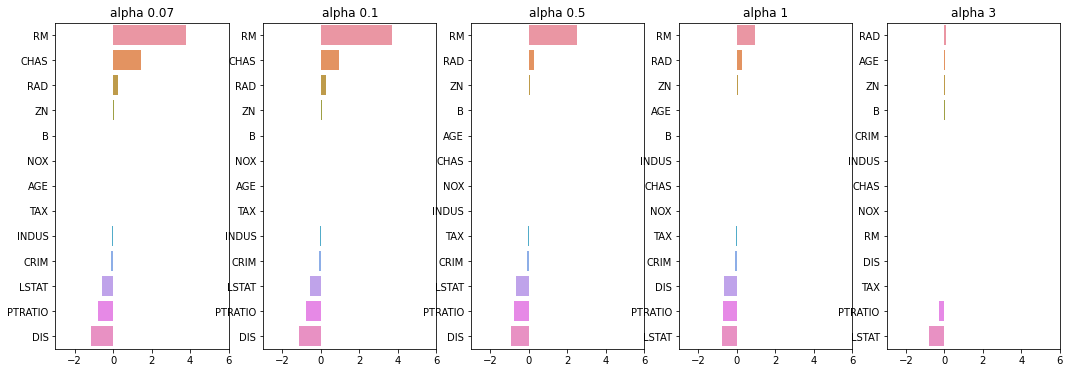

In [36]:
fig, axs = plt.subplots(1, 5, figsize=(18, 6))
coef_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_data, y_target)
    coef = pd.Series(lasso.coef_, index = X_data.columns)
    colname = 'alpha '+str(alpha)
    coef_df[colname] = coef
    coef = coef.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coef.values, y=coef.index, ax=axs[pos])
plt.show()

In [37]:
sort_column = 'alpha '+ str(alphas[0])
coef_df.sort_values(by=sort_column ,ascending=False)

,alpha 0.07,alpha 0.1,alpha 0.5,alpha 1,alpha 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있다.

#### 엘라스틱넷 회귀

엘라스틱넷(Elastic Net) 회귀는 L2 규제와 L1규제를 결합한 회귀.<br>
엘라스틱넷 회귀의 단점은 L1과 L2 규제가 결합된 규제로 인해
수행시간이 상대적으로 오래 걸린다는 것.

#### 선형 회귀 모델을 위한 데이터 변환

선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에<br>
선형의 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결과값을 예측

선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포 형태를 매우 선호.<br>
타깃값의 경우 정규 본포 형태가 아니라 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠
가능성이 높음.

피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있음.

일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행한다.

1. StandardScaler 클래스를 이용해 평균을 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해
   최소값 0, 최대값이 1인 값으로 정규화를 수행.
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우
   이와 같은 방법을 적용
3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨.

타겟값의 경우는 일반적으로 로그 변환을 적용. 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타겟값으로 원복하기 어려울 수 있음

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_scaled_data(method=None, degree=None, input_data=None):
    if method=='Standard':
        st_scaler = StandardScaler()
        scaled_data = st_scaler.fit_transform(input_data)
    elif method=='MinMax':
        mm_scaler = MinMaxScaler()
        scaled_data = mm_scaler.fit_transform(input_data)
    elif method=='Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if degree!=None:
        scaled_data = PolynomialFeatures(degree=degree).fit_transform(scaled_data)
    
    return scaled_data

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax',None), ('MinMax', 2), ('Log', None)]

# 릿지에 사용될 alpha 파라미터의 값을 정리
alphas = [0, 0.1, 1, 10, 100]
for method, degree in scale_methods:
    for alpha in alphas:
        ridge = Ridge(alpha = alpha)
        scaled_X_data = get_scaled_data(method=method, degree=degree, input_data=X_data)
        neg_mse_scores = cross_val_score(ridge, scaled_X_data, y_target, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt( -1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print('method {0} degree {1} alpha {2}일 때 5 folds의 평균 RSME scores : {3:.3f}'.format(method, degree, alpha, avg_rmse))

method None degree None alpha 0일 때 5 folds의 평균 RSME scores : 5.829
method None degree None alpha 0.1일 때 5 folds의 평균 RSME scores : 5.788
method None degree None alpha 1일 때 5 folds의 평균 RSME scores : 5.653
method None degree None alpha 10일 때 5 folds의 평균 RSME scores : 5.518
method None degree None alpha 100일 때 5 folds의 평균 RSME scores : 5.330
method Standard degree None alpha 0일 때 5 folds의 평균 RSME scores : 5.829
method Standard degree None alpha 0.1일 때 5 folds의 평균 RSME scores : 5.826
method Standard degree None alpha 1일 때 5 folds의 평균 RSME scores : 5.803
method Standard degree None alpha 10일 때 5 folds의 평균 RSME scores : 5.637
method Standard degree None alpha 100일 때 5 folds의 평균 RSME scores : 5.421
method Standard degree 2 alpha 0일 때 5 folds의 평균 RSME scores : 75446804976555.625
method Standard degree 2 alpha 0.1일 때 5 folds의 평균 RSME scores : 8.827
method Standard degree 2 alpha 1일 때 5 folds의 평균 RSME scores : 6.871
method Standard degree 2 alpha 10일 때 5 folds의 평균 RSME scores : 5.485
method Stand